#**Advance ML Homework_4_ K-Means Clustering**
Simulasi tugas Mesin Learning Lanjut dengan Python

**Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Create the DataFrame**

In [4]:
#create DataFrame
df = pd.DataFrame({'points': [18, np.nan, 19, 14, 14, 11, 20, 28, 30, 31,
                              35, 33, 29, 25, 25, 27, 29, 30, 19, 23],
                   'assists': [3, 3, 4, 5, 4, 7, 8, 7, 6, 9, 12, 14,
                               np.nan, 9, 4, 3, 4, 12, 15, 11],
                   'rebounds': [15, 14, 14, 10, 8, 14, 13, 9, 5, 4,
                                11, 6, 5, 5, 3, 8, 12, 7, 6, 5]})

#view first five rows of DataFrame
print(df.head())

   points  assists  rebounds
0    18.0      3.0        15
1     NaN      3.0        14
2    19.0      4.0        14
3    14.0      5.0        10
4    14.0      4.0         8


**Clean & Prep the DataFrame**

In [6]:
#drop rows with NA values in any columns
df = df.dropna()

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(df)

#view first five rows of scaled DataFrame
print(scaled_df[:5])

[[-0.86660275 -1.22683918  1.72722524]
 [-0.72081911 -0.96077767  1.45687694]
 [-1.44973731 -0.69471616  0.37548375]
 [-1.44973731 -0.96077767 -0.16521285]
 [-1.88708823 -0.16259314  1.45687694]]


**Find the Optimal Number of Clusters**

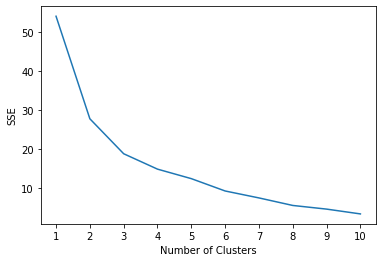

In [7]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**Perform K-Means Clustering with Optimal K**

In [12]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

#append cluster assingments to original DataFrame
df['cluster'] = kmeans.labels_

#view updated DataFrame
print(df)

    points  assists  rebounds  cluster
0     18.0      3.0        15        1
2     19.0      4.0        14        1
3     14.0      5.0        10        1
4     14.0      4.0         8        1
5     11.0      7.0        14        1
6     20.0      8.0        13        1
7     28.0      7.0         9        2
8     30.0      6.0         5        2
9     31.0      9.0         4        0
10    35.0     12.0        11        0
11    33.0     14.0         6        0
13    25.0      9.0         5        0
14    25.0      4.0         3        2
15    27.0      3.0         8        2
16    29.0      4.0        12        2
17    30.0     12.0         7        0
18    19.0     15.0         6        0
19    23.0     11.0         5        0
